In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
sns.set(style="darkgrid")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10,7)

In [2]:
oecd_bli = pd.read_csv('datasets/lifesat/oecd_bli_2015.csv',thousands=',')
gdp_per_capita = pd.read_csv('datasets/lifesat/gdp_per_capita.csv',thousands=',',delimiter='\t',encoding='latin1',na_values='n/a')

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [4]:
country_stats = prepare_country_stats(oecd_bli,gdp_per_capita)

In [5]:
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


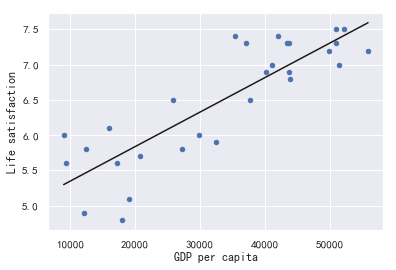

In [6]:
from sklearn.linear_model import LinearRegression
country_stats.plot(kind='scatter',x='GDP per capita',y='Life satisfaction')
lin_reg_model = LinearRegression()
lin_reg_model.fit(X,y)
plt.plot(X,lin_reg_model.predict(X),'-k')

In [7]:
lin_reg_model.predict([[22587]])

array([[5.96242338]])

In [8]:
lin_reg_model.coef_

array([[4.91154459e-05]])

In [9]:
lin_reg_model.intercept_

array([4.8530528])